In [1]:
import numpy as np #calculation of lenear Algebra
import pandas as pd #data frame (data processing, CSV file I/O) (e.g. pd.read_csv)
import seaborn as sns #data visualization
from matplotlib import pyplot as plt #data visualization
%matplotlib inline
import os #interact with the underlying operating system
# supress/hide warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PDFMalware2022.csv")
df.isnull().sum()
new_df=df.dropna(axis=0,how='any')

Mounted at /content/drive


In [3]:
print("Old Dataframe length: ", len(df))
print("New Dataframe lenght: ", len(new_df))
print("Number of rows with at least 1 Null Values: ",(len(df)-len(new_df)))

Old Dataframe length:  10026
New Dataframe lenght:  10023
Number of rows with at least 1 Null Values:  3


In [4]:
print(new_df['text'].value_counts())
print(len(new_df))

new_df = new_df[new_df.text !='-1']
new_df = new_df[new_df.text !='0']


No         5398
Yes        3761
unclear     549
-1          302
0            13
Name: text, dtype: int64
10023


In [5]:
new_df['text'].replace(['No','Yes','unclear', '-1', '0'],[0,1,2,3,4],inplace=True)
print(new_df['text'].value_counts())
print(len(new_df))

print("Clas names converted to 1 and 0:")
new_df['Class'].replace(['Malicious','Benign'],[1,0],inplace=True)
print(new_df['Class'].value_counts())

0    5398
1    3761
2     549
Name: text, dtype: int64
9708
Clas names converted to 1 and 0:
1    5244
0    4464
Name: Class, dtype: int64


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
fit_df = new_df.apply(le.fit_transform)
fit_df.describe()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
count,9708.00000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,...,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000
mean,4853.50000,68.070148,82.017099,3.288834,115.503193,9.435826,0.007108,0.021014,5.474866,0.500515,...,1.173877,1.265863,1.414916,1.008344,0.951483,0.958076,1.838381,0.999588,1.655954,0.540173
std,2802.60254,90.707512,75.085481,7.084881,212.536648,18.200827,0.084010,0.153833,13.942629,0.602611,...,2.169316,0.596926,0.945007,0.757390,0.257203,0.264662,3.489722,0.355388,4.065383,0.498409
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2426.75000,10.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,4853.50000,38.000000,70.000000,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,7280.25000,81.000000,127.000000,2.000000,80.000000,14.000000,0.000000,0.000000,2.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9707.00000,499.000000,390.000000,84.000000,901.000000,147.000000,1.000000,3.000000,87.000000,2.000000,...,39.000000,6.000000,8.000000,15.000000,5.000000,4.000000,17.000000,5.000000,58.000000,1.000000


In [7]:
fit_df.drop(['Fine name','pageno','AA','JBIG2Decode', 'launch','encrypt','embedded files', 'isEncrypted', 'RichMedia', 'Acroform','EmbeddedFile','title characters','Colors'],inplace=True,axis=1)

In [8]:
fit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9708 entries, 0 to 10025
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   pdfsize        9708 non-null   int64
 1   metadata size  9708 non-null   int64
 2   pages          9708 non-null   int64
 3   xref Length    9708 non-null   int64
 4   images         9708 non-null   int64
 5   text           9708 non-null   int64
 6   header         9708 non-null   int64
 7   obj            9708 non-null   int64
 8   endobj         9708 non-null   int64
 9   stream         9708 non-null   int64
 10  endstream      9708 non-null   int64
 11  xref           9708 non-null   int64
 12  trailer        9708 non-null   int64
 13  startxref      9708 non-null   int64
 14  ObjStm         9708 non-null   int64
 15  JS             9708 non-null   int64
 16  Javascript     9708 non-null   int64
 17  OpenAction     9708 non-null   int64
 18  XFA            9708 non-null   int64
 19  Class

In [9]:
from sklearn.model_selection import train_test_split

def data_split(data, data_target):
  X,X_test,Y,y_test= train_test_split(data, data_target,test_size=0.2, shuffle = True, random_state = 0)
  X_train,X_val,y_train,y_val = train_test_split(X, Y,test_size=0.1, shuffle = True, random_state = 0)
  print("X_train shape: {}".format(X_train.shape), "y_train shape: {}".format(y_train.shape))
  print("X_val shape: {}".format(X_val.shape), "y_val shape: {}".format(y_val.shape))
  print("X_test shape: {}".format(X_test.shape), "y_test shape: {}".format(y_test.shape))
  return X_train,X_val,X_test,y_train,y_val,y_test

target_name = 'Class'
data_target = fit_df['Class']
data = fit_df.drop(['Class'], axis=1)
X_train,X_val,X_test,y_train,y_val,y_test = data_split(data, data_target)

X_train shape: (6989, 19) y_train shape: (6989,)
X_val shape: (777, 19) y_val shape: (777,)
X_test shape: (1942, 19) y_test shape: (1942,)


For cross validation neural network only

In [ ]:

target_name = 'Class'
data_target = fit_df['Class']
data = fit_df.drop(['Class'], axis=1)
print(data.shape)
print(data_target.shape)

(9708, 19)
(9708,)


In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


def display_result(acc_training, accuracy_validation, accuracy_test, y_pred_test_gnb):
  print("Accuracy on the Training set:{:.2f}%".format(acc_training))
  print("Accuracy on the Validation set: {:.2f}%".format(accuracy_validation * 100))
  print("Accuracy on the Test set: {:.2f}%".format(accuracy_test * 100))

  precision = precision_score(y_test, y_pred_test_gnb)
  recall = recall_score(y_test, y_pred_test_gnb)
  f1 = f1_score(y_test, y_pred_test_gnb)

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-score:", f1)


print("The results of Gaussian Naive Bayes:")
gaussian_naive = GaussianNB()

def implement_gaussian_naive_bayes(X_train,X_val,X_test,y_train,y_val,y_test):

    gaussian_naive.fit(X_train, y_train)
    acc_gaussian_training = round(gaussian_naive.score(X_train, y_train) * 100, 2)
    y_pred_validation = gaussian_naive.predict(X_val)
    accuracy_validation = accuracy_score(y_val, y_pred_validation)
    y_pred_test_gnb = gaussian_naive.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test_gnb)
    display_result(acc_gaussian_training,accuracy_validation, accuracy_test,y_pred_test_gnb)

implement_gaussian_naive_bayes(X_train,X_val,X_test,y_train,y_val,y_test)

The results of Gaussian Naive Bayes:
Accuracy on the Training set:89.76%
Accuracy on the Validation set: 88.93%
Accuracy on the Test set: 88.62%
Precision: 0.8566402814423922
Recall: 0.9437984496124031
F1-score: 0.8981097279852467


def

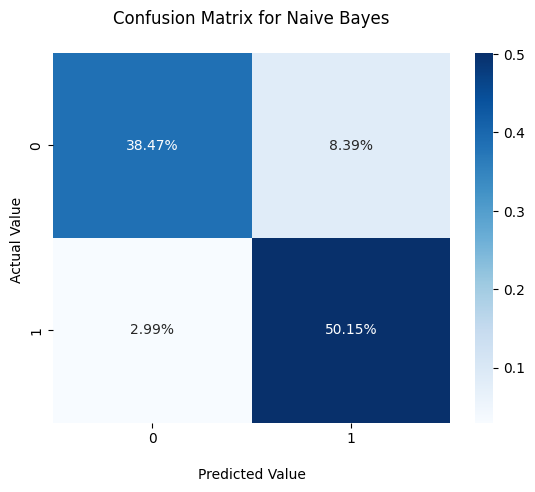

In [11]:
y_pred_gauss = gaussian_naive.predict(X_test)

def build_confusion_matrix():
  cf_matrix = confusion_matrix(y_test, y_pred_gauss)
  ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
  ax.set_title('Confusion Matrix for Naive Bayes\n');
  ax.set_xlabel('\nPredicted Value')
  ax.set_ylabel('Actual Value ');
  plt.show()

build_confusion_matrix()

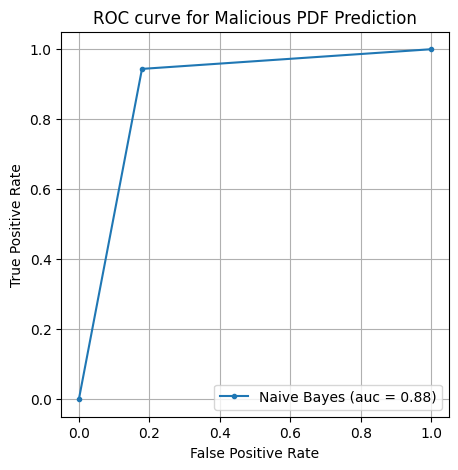

In [12]:
from sklearn.metrics import roc_curve, auc
gaussian_fpr, gaussian_tpr, threshold = roc_curve(y_test, y_pred_gauss)
auc_gaussian = auc(gaussian_fpr, gaussian_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(gaussian_fpr, gaussian_tpr, marker='.', label='Naive Bayes (auc = %0.2f)' % auc_gaussian)
plt.title('ROC curve for Malicious PDF Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()



In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

def display_result(acc_training, accuracy_validation, accuracy_test,y_pred_test_logreg):
  print("Accuracy on the Training set:{:.2f}%".format(acc_training))
  print("Accuracy on the Validation set: {:.2f}%".format(accuracy_validation * 100))
  print("Accuracy on the Test set: {:.2f}%".format(accuracy_test * 100))

  precision = precision_score(y_test, y_pred_test_logreg)
  recall = recall_score(y_test, y_pred_test_logreg)
  f1 = f1_score(y_test, y_pred_test_logreg)

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-score:", f1)


print("The results of Logistic Regression:")
logreg = LogisticRegression()

def implement_logistic_regression(X_train,X_val,X_test,y_train,y_val,y_test):
    logreg.fit(X_train, y_train)
    acc_logreg = round(logreg.score(X_train, y_train) * 100, 2)
    y_pred_validation = logreg.predict(X_val)
    accuracy_validation = accuracy_score(y_val, y_pred_validation)
    y_pred_test_logreg = logreg.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test_logreg)
    display_result(acc_logreg, accuracy_validation, accuracy_test,y_pred_test_logreg)

implement_logistic_regression(X_train,X_val,X_test,y_train,y_val,y_test)


The results of Logistic Regression:
Accuracy on the Training set:91.24%
Accuracy on the Validation set: 90.35%
Accuracy on the Test set: 90.37%
Precision: 0.8816621499548328
Recall: 0.9457364341085271
F1-score: 0.9125759700794763


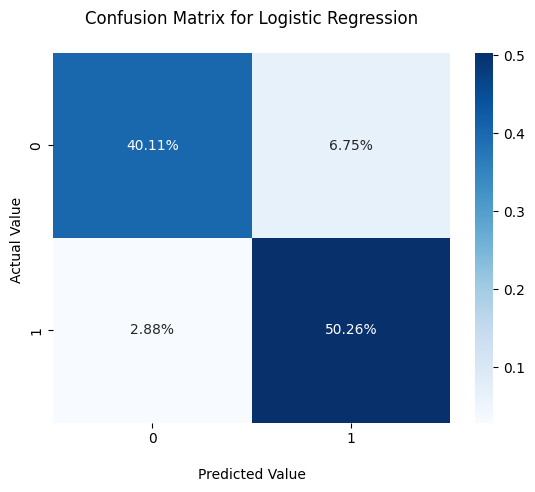

In [17]:
y_pred_log_reg = logreg.predict(X_test)

def build_confusion_matrix():
  cf_matrix = confusion_matrix(y_test, y_pred_log_reg)
  ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
  ax.set_title('Confusion Matrix for Logistic Regression\n');
  ax.set_xlabel('\nPredicted Value')
  ax.set_ylabel('Actual Value ');
  plt.show()

build_confusion_matrix()

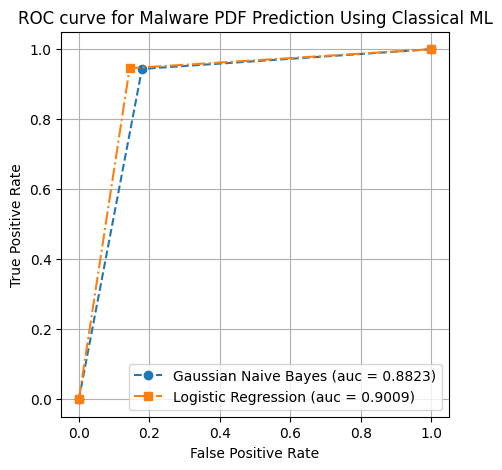

In [40]:

from sklearn.metrics import roc_curve, auc

gaussian_fpr, gaussian_tpr, gaussian_threshold = roc_curve(y_test, y_pred_gauss)
auc_gaussian = auc(gaussian_fpr, gaussian_tpr)

log_reg_fpr, log_reg_tpr, log_reg_threshold = roc_curve(y_test, y_pred_log_reg)
auc_logreg = auc (log_reg_fpr, log_reg_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(gaussian_fpr, gaussian_tpr, marker='o',linestyle='--', label='Gaussian Naive Bayes (auc = %0.4f)' % auc_gaussian)
plt.plot(log_reg_fpr, log_reg_tpr, marker='s', linestyle='-.', label='Logistic Regression (auc = %0.4f)' % auc_logreg)


plt.title('ROC curve for Malware PDF Prediction Using Classical ML')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.grid(True)
plt.show()

Random forest classifier for feature importance

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
y = fit_df['Class']
X = fit_df.drop('Class', axis=1)  # Replace 'target_column_name' with the actual target column name
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


          Feature  Importance
13      startxref    0.147472
9          stream    0.139866
1   metadata size    0.111038
16     Javascript    0.109418
15             JS    0.099711
0         pdfsize    0.094234
6          header    0.036684
3     xref Length    0.036385
10      endstream    0.034734
11           xref    0.029877
18            XFA    0.024112
4          images    0.023205
7             obj    0.021308
8          endobj    0.019653
2           pages    0.017060
5            text    0.016603
17     OpenAction    0.016399
12        trailer    0.015653
14         ObjStm    0.006587


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
#data = pd.read_csv('your_dataset.csv')

# Split the dataset into features (X) and target variable (y)
y = fit_df['Class']
X = fit_df.drop('Class', axis=1)  # Replace 'target_column_name' with the actual target column name

# Create a Random Forest classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the data
clf.fit(X, y)

# Get the feature importances from the trained model
feature_importances = clf.feature_importances_

# Create a dataframe to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)


          Feature  Importance
13      startxref    0.541175
6          header    0.118752
16     Javascript    0.105091
1   metadata size    0.090834
11           xref    0.035233
9          stream    0.024113
0         pdfsize    0.024031
14         ObjStm    0.019098
3     xref Length    0.010282
4          images    0.005501
8          endobj    0.004859
18            XFA    0.004130
2           pages    0.004109
5            text    0.004020
17     OpenAction    0.002398
7             obj    0.001904
10      endstream    0.001868
15             JS    0.001798
12        trailer    0.000806


In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

NameError: ignored

Applying cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
n_splits = 5  # Number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [ ]:
def create_model():
    model = Sequential([

        Dense(64, input_dim =19, activation ="relu"),
        Dense(128, activation = "relu"),
        Dropout(0.2),
        Dense(64, activation = "relu"),
        Dropout(0.3),
        Dense(32, activation = "relu"),
        Dropout(0.3),
        Dense(16, activation = "relu"),
        Dense(8, activation = "relu"),
        Dense(1, activation ="sigmoid")

    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Perform cross-validation
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=300, batch_size=32)


In [ ]:
results = cross_val_score(model, data, data_target, cv=kf, scoring='accuracy')

# Output the accuracy scores for each fold
for i, score in enumerate(results):
    print(f"Fold {i+1}: Accuracy = {score:.4f}")

# Calculate the average accuracy score across all folds
mean_accuracy = np.mean(results)
print(f"Mean Accuracy: {mean_accuracy:.4f}")

Epoch 1/300
243/243 [==============================] - 3s 3ms/step - loss: 0.8579 - accuracy: 0.5876
Epoch 2/300
243/243 [==============================] - 1s 3ms/step - loss: 0.4695 - accuracy: 0.7768
Epoch 3/300
243/243 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.8818
Epoch 4/300
243/243 [==============================] - 1s 3ms/step - loss: 0.2269 - accuracy: 0.9166
Epoch 5/300
243/243 [==============================] - 1s 3ms/step - loss: 0.2024 - accuracy: 0.9265
Epoch 6/300
243/243 [==============================] - 1s 4ms/step - loss: 0.1789 - accuracy: 0.9377
Epoch 7/300
243/243 [==============================] - 1s 4ms/step - loss: 0.1614 - accuracy: 0.9432
Epoch 8/300
243/243 [==============================] - 1s 4ms/step - loss: 0.1588 - accuracy: 0.9427
Epoch 9/300
243/243 [==============================] - 1s 4ms/step - loss: 0.1508 - accuracy: 0.9467
Epoch 10/300
243/243 [==============================] - 1s 4ms/step - loss: 0.1311 - accura

In [ ]:
from keras.backend import dropout
model = Sequential()
model.add(Dense(64, input_dim =19, activation ="relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation ="sigmoid"))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                1280      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
model.compile(loss= "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"] )

In [ ]:
history = model.fit(X_train, y_train,  epochs=300, batch_size=32, shuffle=True, validation_data =(X_val, y_val))

Epoch 1/300
219/219 [==============================] - 2s 4ms/step - loss: 0.2012 - accuracy: 0.9197 - val_loss: 0.1471 - val_accuracy: 0.9614
Epoch 2/300
219/219 [==============================] - 1s 3ms/step - loss: 0.0582 - accuracy: 0.9845 - val_loss: 0.1213 - val_accuracy: 0.9743
Epoch 3/300
219/219 [==============================] - 1s 3ms/step - loss: 0.0495 - accuracy: 0.9860 - val_loss: 0.1319 - val_accuracy: 0.9665
Epoch 4/300
219/219 [==============================] - 1s 3ms/step - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.1228 - val_accuracy: 0.9730
Epoch 5/300
219/219 [==============================] - 1s 3ms/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.1103 - val_accuracy: 0.9717
Epoch 6/300
219/219 [==============================] - 1s 3ms/step - loss: 0.0260 - accuracy: 0.9910 - val_loss: 0.1365 - val_accuracy: 0.9704
Epoch 7/300
219/219 [==============================] - 1s 4ms/step - loss: 0.0259 - accuracy: 0.9908 - val_loss: 0.1160 - val_accuracy: 0.9743

In [ ]:
eval_model=model.evaluate(X_train, y_train)
eval_model

219/219 [==============================] - 0s 2ms/step - loss: 3.8283e-10 - accuracy: 1.0000


[3.828316275100718e-10, 1.0]

In [ ]:
y_pred= model.predict(X_test)
y_pred =(y_pred>0.5)
y_pred.shape

61/61 [==============================] - 0s 3ms/step


(1942, 1)

In [ ]:
#Validation or test accuracy average
eval_model_val=model.evaluate(X_val, y_val)
eval_model_val

25/25 [==============================] - 0s 2ms/step - loss: 0.8294 - accuracy: 0.9820


[0.829386293888092, 0.9819819927215576]

In [ ]:
#Validation or test accuracy average
eval_model_test=model.evaluate(X_test, y_test)
eval_model_test

61/61 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.9861


[0.5880688428878784, 0.9860967993736267]

In [ ]:
print(y_test.shape)
print(y_pred.shape)
y_pred

(1942,)
(1942, 1)


array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
result = confusion_matrix( y_test , y_pred)
result

array([[ 895,   15],
       [  12, 1020]])

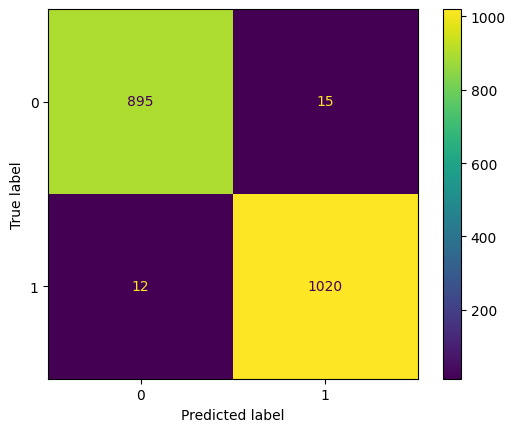

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=result)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       910
           1       0.99      0.99      0.99      1032

    accuracy                           0.99      1942
   macro avg       0.99      0.99      0.99      1942
weighted avg       0.99      0.99      0.99      1942

